# About dataset


Here we have stock data from Google. This dataset contains 14 columns and 1257 Rows. Each columns are assigned to a attribute and rows contains the values for that attribute. It has date wise data of the stock starting from 2016 to 2021.
* The 14 columns are:

- symbol :  Name of the company (in this case Google)
- date : year and date
- close: closing of stock value
- high: highest value of stock at that day
- low: lowest value of stock at that day
- open: opening value of stock at that day
- volume
- adjClose
- adjHigh
- adjLow
- adjOpen
- adjVolume
- divCash
- splitFactor

<a name="toc_40015_1."></a>
# `1. Importing Libraries `

In [ ]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
plt.style.use('seaborn')

<ipython-input-50-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<a name="toc_40015_2."></a>
#  `2. Reading Dataset `

In [ ]:
Data = pd.read_csv('googlestock.csv')
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,19-08-2004,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,20-08-2004,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,23-08-2004,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,24-08-2004,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,25-08-2004,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,18-03-2022,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,21-03-2022,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,22-03-2022,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,23-03-2022,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [ ]:
df = pd.DataFrame(Data)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,19-08-2004,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,20-08-2004,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,23-08-2004,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,24-08-2004,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,25-08-2004,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,18-03-2022,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,21-03-2022,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,22-03-2022,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,23-03-2022,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


<a name="toc_40015_3."></a>
# `3. EDA & Preproccesing `

In [ ]:
# Shape of the dataset (Rows, Columns)
df.shape

(4431, 7)

In [ ]:
# Searching for missing values
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Searching for dublicated values by checking the date column
df['Date'].duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df

<ipython-input-57-8a167c87bbd7>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], utc=True)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19 00:00:00+00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20 00:00:00+00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23 00:00:00+00:00,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24 00:00:00+00:00,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25 00:00:00+00:00,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18 00:00:00+00:00,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21 00:00:00+00:00,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22 00:00:00+00:00,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23 00:00:00+00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       4431 non-null   datetime64[ns, UTC]
 1   Open       4431 non-null   float64            
 2   High       4431 non-null   float64            
 3   Low        4431 non-null   float64            
 4   Close      4431 non-null   float64            
 5   Adj Close  4431 non-null   float64            
 6   Volume     4431 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 242.4 KB


In [ ]:
df = df.sort_values(by='Date')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19 00:00:00+00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20 00:00:00+00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23 00:00:00+00:00,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24 00:00:00+00:00,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25 00:00:00+00:00,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18 00:00:00+00:00,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21 00:00:00+00:00,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22 00:00:00+00:00,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23 00:00:00+00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [ ]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [ ]:
DF = df.copy()
DF['Date'] = pd.to_datetime(DF['Date'])
# Set 'date' column as index
DF = DF.set_index('Date')
DF

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800


In [ ]:
DF.drop(columns =['Adj Close','Volume'] , inplace=True)
DF

,Open,High,Low,Close
Date,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219
2004-08-20,50.555557,54.594597,50.300301,54.209209
2004-08-23,55.430431,56.796799,54.579578,54.754753
2004-08-24,55.675674,55.855858,51.836838,52.487488
2004-08-25,52.532532,54.054054,51.991993,53.053055
...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107


<a name="toc_40015_4."></a>
# `4. Visualization `

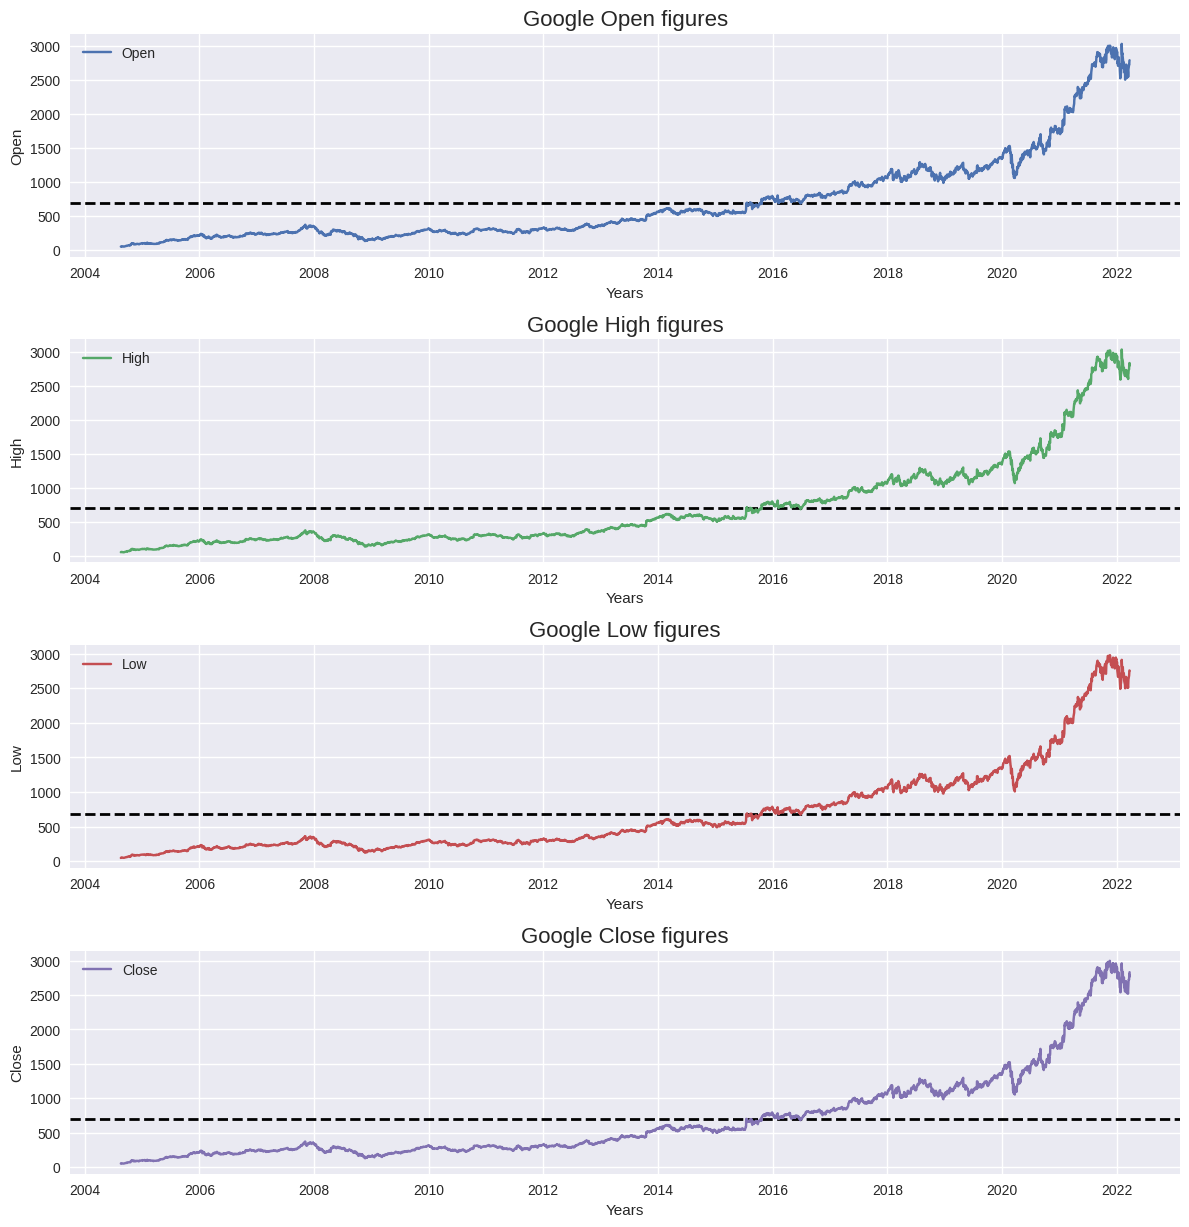

In [ ]:
# This code plots columns in a dataframe.

# The number of rows, columns, and the subplot counter are initialized.
a = 5  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

colors = plt.rcParams["axes.prop_cycle"]()
# A figure is initialized
fig = plt.figure(figsize=(12,15))

for i in range(len(DF.columns)):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    #Plotting the line for each column in a different color
    plt.plot(DF[DF.columns[i]], color = color)
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Adding a horizontal line for the average of the column
    plt.axhline(DF[DF.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    #Adding Title
    plt.title("Google "+ DF.columns[i] + " figures", fontsize=16)
    plt.xlabel('Years')
    #Adding y axis label
    plt.ylabel(DF.columns[i])
    #Adding Legend
    plt.legend([DF.columns[i]])
    #Plot Counter value is increased by one after each iteration
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

<a name="toc_40015_5."></a>
# `5. Prepering data for trainning and testing the model `

In [ ]:
training_set = DF[:'2020'].iloc[:,0:1].values
test_set = DF['2020':].iloc[:,0:1].values

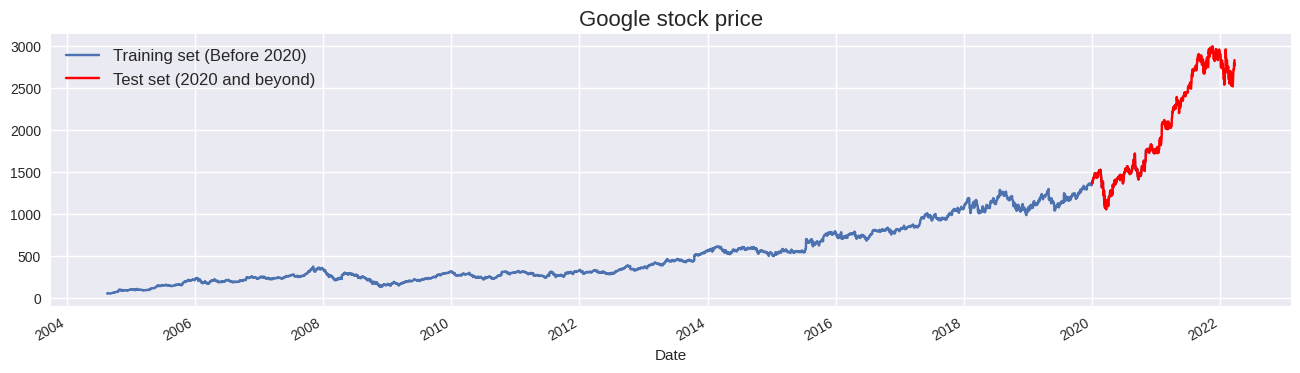

In [ ]:
# Using 'close' price for prediction.
DF['Close'][:'2020'].plot(figsize=(16,4),legend=True)
DF['Close']['2020':].plot(figsize=(16,4),legend=True, color = 'r')
plt.legend(['Training set (Before 2020)','Test set (2020 and beyond)'], fontsize=12)
plt.title('Google stock price', fontsize=16)
plt.show()

In [ ]:
# Normalization is very important in all deep learning in general. Normalization makes the properties more consistent.
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
timesteps = 60

In [ ]:
"""
Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output.
For each element of training set, we have 60 previous training set elements.

"""

X_train = []
y_train = []
for i in range(timesteps,1147):
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
"""
We get the test set ready in a similar way as the training set.
The following has been done so first 60 entires of test set have 60 previous values
which is impossible to get unless we take the whole 'High' attribute data for processing

"""

dataset_total = pd.concat((DF['Close'][:'2020'], DF['Close']['2020':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

<a name="toc_40015_6."></a>
# `6. Creating the model  `

In [ ]:
# The LSTM architecture
Model = Sequential()
# First LSTM layer with Dropout regularisation
Model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1],1)))
Model.add(Dropout(0.2))
# Second LSTM layer
Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(0.2))
# Third LSTM layer
Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(0.2))
# Fourth LSTM layer
##add 4th lstm layer
#Model.add(layers.LSTM(units = 100))
#Model.add(layers.Dropout(rate = 0.2))

Model.add(layers.LSTM(units = 100, return_sequences = False))
Model.add(layers.Dropout(rate = 0.2))
Model.add(layers.Dense(units = 25))
Model.add(layers.Dense(units = 1))
# The output layer
Model.add(Dense(units = 1))

Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 dropout_4 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_5 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100)              

In [ ]:
# Compiling the model
Model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics =['accuracy'])

In [ ]:
# Epochs and Batch Size
epochs = 15
batch_size = 32

In [ ]:
#from keras import callbacks
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 2, restore_best_weights = True)

# Fitting the model
history =  Model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/15
34/34 [==============================] - 16s 227ms/step - loss: 8.6931e-04 - accuracy: 0.0000e+00
Epoch 2/15
34/34 [==============================] - 6s 190ms/step - loss: 1.5874e-04 - accuracy: 0.0000e+00
Epoch 3/15
34/34 [==============================] - 8s 226ms/step - loss: 1.4313e-04 - accuracy: 0.0000e+00
Epoch 4/15
34/34 [==============================] - 7s 203ms/step - loss: 1.0566e-04 - accuracy: 0.0000e+00
Epoch 5/15
34/34 [==============================] - 7s 210ms/step - loss: 1.0489e-04 - accuracy: 0.0000e+00
Epoch 6/15
34/34 [==============================] - 8s 226ms/step - loss: 1.0027e-04 - accuracy: 0.0000e+00
Epoch 7/15
34/34 [==============================] - 6s 191ms/step - loss: 7.8947e-05 - accuracy: 0.0000e+00
Epoch 8/15
34/34 [==============================] - 8s 224ms/step - loss: 8.8922e-05 - accuracy: 0.0000e+00
Epoch 9/15
34/34 [==============================] - 6s 190ms/step - loss: 7.1706e-05 - accuracy: 0.0000e+00
Epoch 10/15
34/34 [========

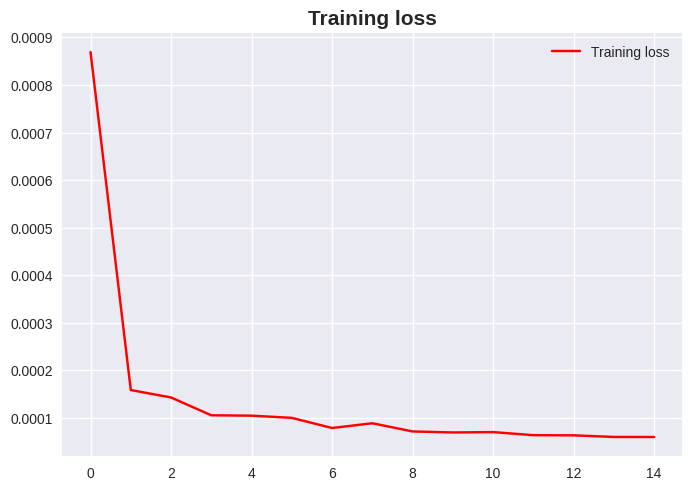

<Figure size 800x550 with 0 Axes>

In [ ]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
predicted_stock_price = Model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

18/18 [==============================] - 3s 64ms/step


In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Google Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

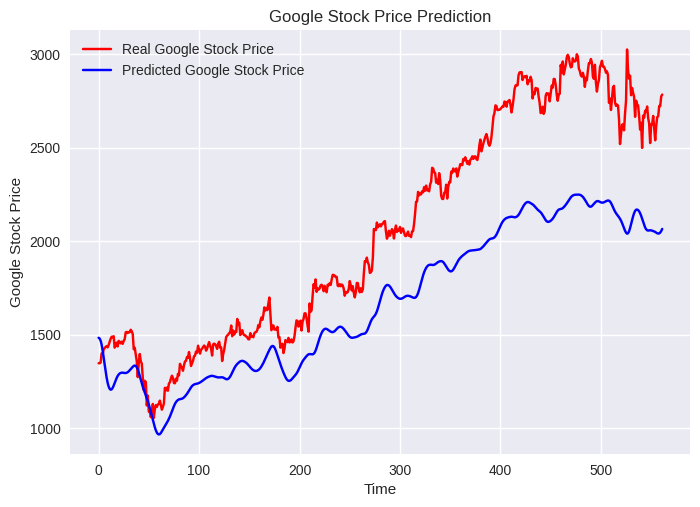

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set, predicted_stock_price)